In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize']=5,4

In [2]:
file = "DataAcquisitionMerging/requireddata.xlsx"
pd.options.display.float_format = '{:.2f}'.format  # to get rid of large decimal point in excel
funds= pd.read_excel(file,index=False)
funds = funds.loc[:, ~funds.columns.str.contains('^Unnamed')]

In [3]:
funds.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_at,funded_quarter,funded_year,raised_amount_usd
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,1984-01-01,1984-Q1,1984,12663383.67
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,1987-01-01,1987-Q1,1987,2500000.00
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,1989-06-01,1989-Q2,1989,12663383.67
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,1990-11-30,1990-Q4,1990,17550000.00
4,Market Wire,Advertising,El Segundo,Sequoia Capital,Venture Capital,Menlo Park,venture,1990-11-30,1990-Q4,1990,17550000.00


In [4]:
revised_funds = funds

In [5]:
revised_funds['funded_month'] = pd.DatetimeIndex(revised_funds['funded_at']).month
revised_funds.funded_quarter = revised_funds.funded_quarter.str[5:7]

In [6]:
revised_funds = revised_funds.drop(['funded_at'],axis=1)

In [7]:
revised_funds.head(4)

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_quarter,funded_year,raised_amount_usd,funded_month
0,Lenovo,Hardware,Morrisville,Chinese Academy Of Sciences,Education,Beijing,undisclosed,Q1,1984,12663383.67,1
1,Cisco,Software,San Jose,Sequoia Capital,Venture Capital,Menlo Park,venture,Q1,1987,2500000.00,1
2,Office Depot,E-Commerce,Boca Raton,Upfront Ventures,Finance,Los Angeles,undisclosed,Q2,1989,12663383.67,6
3,Market Wire,Advertising,El Segundo,Perkins Coie,Legal,Anchorage,venture,Q4,1990,17550000.00,11


In [103]:
sorted_funds = revised_funds.sort_values('raised_amount_usd',ascending=False)

In [104]:
sorted_funds.describe()

,funded_year,raised_amount_usd,funded_month
count,26209.00,26209.00,26209.00
mean,2010.90,15600428.16,6.35
std,2.93,64970607.29,3.40
min,1984.00,0.00,1.00
25%,2009.00,1800000.00,3.00
50%,2012.00,8000000.00,6.00
75%,2013.00,13000000.00,9.00
max,2014.00,3200000000.00,12.00


### Detect outliears

#### Using Z score

#### z=(X-u)/std   #mean

In [105]:
outliers=[]
def detect_outliers(data):
    threshold=3;
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [106]:
out = detect_outliers(sorted_funds.raised_amount_usd)


In [108]:
sorted_funds = sorted_funds[~sorted_funds['raised_amount_usd'].isin(out)]

In [110]:
sorted_funds.head()

,company_name,company_market,company_city,investor_name,investor_market,investor_city,funding_round_type,funded_quarter,funded_year,raised_amount_usd,funded_month
23640,Flipkart,Online Shopping,Bangalore,Tiger Global Management,Investment Management,New York,venture,Q2,2014,210000000.00,5
23635,Flipkart,Online Shopping,Bangalore,DST Global,Software,Surbiton,venture,Q2,2014,210000000.00,5
23638,Flipkart,Online Shopping,Bangalore,Naspers,Media,Cape Town,venture,Q2,2014,210000000.00,5
25845,Ola (ANI Technologies Pvt. Ltd.),Transportation,Bangalore,SoftBank,Media,Tokyo,venture,Q4,2014,210000000.00,10
19434,Highwinds,Software,Winter Park,Goldman Sachs,Finance,New York,debt_financing,Q3,2013,205000000.00,8


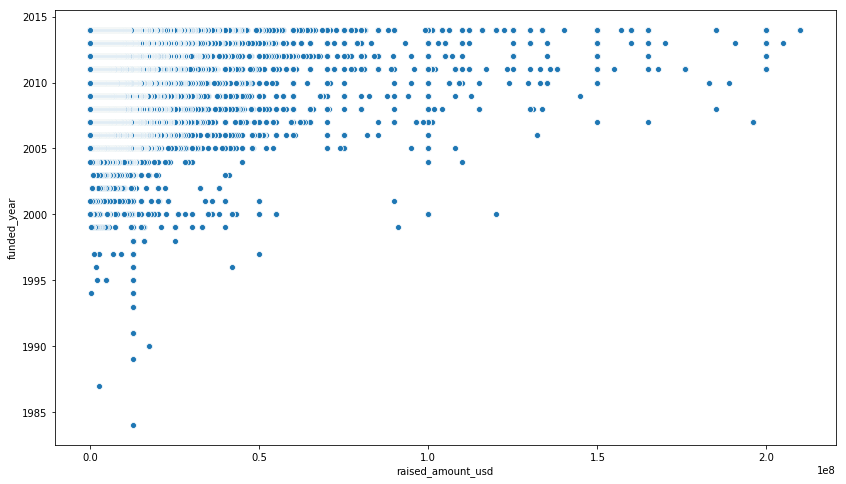

In [111]:
plt.figure(figsize=(14,8))
sns.scatterplot(sorted_funds['raised_amount_usd'],sorted_funds['funded_year'])

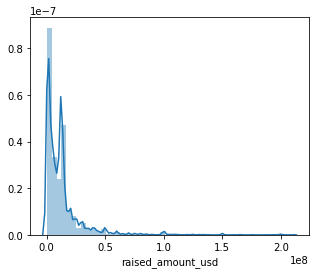

In [113]:
sns.distplot(sorted_funds.raised_amount_usd)

### Now lets find what all features are important to build the model

#### Lets try Wrapping method

In [186]:
fund_df = pd.get_dummies(data=sorted_funds,columns=['company_market'])

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X = fund_df.drop(['company_name', 'company_city', 'investor_name', 'investor_market',
       'investor_city', 'funding_round_type', 'funded_quarter', 'funded_year',
       'raised_amount_usd', 'funded_month'],axis=1)

In [189]:
y = sorted_funds.raised_amount_usd

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def feature_wrapper(X,y):
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('Predicted value : ',y_pred)
    print('MSE : ',mean_squared_error(y_test,y_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R square score : ',r2_score(y_test,y_pred))

In [222]:
feature_wrapper(X,y)

Predicted value :  [ 1728512. 13893632. 11829248. ... 22880256.  -565248. 16310272.]
MSE :  5.155776039704167e+32
RMSE :  2.2706334005524024e+16
R square score :  -1.5465071316195633e+18


In [243]:
fund_df = pd.get_dummies(data=sorted_funds,columns=['investor_market'])

In [244]:
X = fund_df.drop(['company_name', 'company_market','company_city', 'investor_name',
       'investor_city', 'funding_round_type', 'funded_quarter', 'funded_year',
       'raised_amount_usd', 'funded_month'],axis=1)


In [245]:
feature_wrapper(X,y)

Predicted value :  [12551093.86913645 12658615.12968597 12658615.12968597 ...
 12551093.86913645 12658615.12968597 12551093.86913645]
MSE :  328963967672213.94
RMSE :  18137363.856752004
R square score :  0.02584578036209506


In [246]:
fund_df = pd.get_dummies(data=sorted_funds,columns=['investor_city'])

In [251]:
X = fund_df.drop(['company_name','company_market', 'company_city', 'investor_name','investor_market', 
                  'funding_round_type', 'funded_quarter', 'funded_year','raised_amount_usd', 'funded_month'],axis=1)


In [253]:
feature_wrapper(X,y)

Predicted value :  [16184320. 10753024. 16184320. ... 15266816. 16831488.  9491456.]
MSE :  6.838143958067731e+38
RMSE :  2.614984504364745e+19
R square score :  -2.1865711938470708e+24


In [256]:
fund_df = pd.get_dummies(data=sorted_funds,columns=['funding_round_type'])

In [261]:
X = fund_df.drop(['company_name','company_market', 'company_city', 'investor_name','investor_market','investor_city', 
                   'funded_quarter', 'funded_year','raised_amount_usd', 'funded_month'],axis=1)


In [304]:
feature_wrapper(X,y)

Predicted value :  [12417006.5785381  12733053.50197371 12100959.65510248 ...
 12575030.0402559  12496018.309397   12575030.0402559 ]
MSE :  402183187164722.94
RMSE :  20054505.408130188
R square score :  0.0001609982111681063


In [293]:
fund_df = pd.get_dummies(data=sorted_funds,columns=['funded_quarter'])

In [268]:
X = fund_df.drop(['company_name','company_market', 'company_city', 'investor_name', 'investor_market',
       'investor_city', 'funding_round_type', 'funded_year',
       'raised_amount_usd', 'funded_month'],axis=1)


In [269]:
feature_wrapper(X,y)

Predicted value :  [13119488. 13094912. 12709888. ... 12709888. 13119488. 13094912.]
MSE :  312051648406084.3
RMSE :  17664983.67975709
R square score :  -0.0011285738495032671


In [286]:
X = fund_df[['funded_year']]

In [289]:
feature_wrapper(X,y)

Predicted value :  [12164935.94698328 12437158.09421974 12437158.09421974 ...
 12164935.94698328 13117713.46231097 12981602.38869274]
MSE :  358488572018912.8
RMSE :  18933794.44324124
R square score :  0.0005584404081973027


In [290]:
X = fund_df[['funded_month']]

In [291]:
feature_wrapper(X,y)

Predicted value :  [12170811.54729843 13022929.59404182 12490355.8148272  ...
 12170811.54729843 12170811.54729843 12703385.32651305]
MSE :  355242472666994.8
RMSE :  18847877.1395347
R square score :  0.00018924521414942497


In [307]:
dummies_fund = pd.get_dummies(data=sorted_funds,columns=['company_name', 'company_market', 'company_city', 'investor_name',
       'investor_market', 'investor_city', 'funding_round_type',
       'funded_quarter'])

In [ ]:
sns.heatmap(dummies_fund)